# Кластерный анализ

In [179]:
import pandas as pd

data = pd.read_csv("bank.csv", sep=";",  decimal=",")
pd.set_option('display.max_rows', 35)

In [25]:
data 

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no
...,...,...,...,...,...,...,...,...,...
393,59,housemaid,married,primary,no,0,no,no,no
394,38,blue-collar,married,secondary,no,1370,yes,no,no
395,58,management,married,secondary,no,37,no,no,no
396,34,management,single,tertiary,no,673,yes,yes,no


Нулевых значений нет, 2 числовых признака и 7 категориальных

In [26]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        398 non-null    int64 
 1   job        398 non-null    object
 2   marital    398 non-null    object
 3   education  398 non-null    object
 4   default    398 non-null    object
 5   balance    398 non-null    int64 
 6   housing    398 non-null    object
 7   loan       398 non-null    object
 8   y          398 non-null    object
dtypes: int64(2), object(7)
memory usage: 28.1+ KB


Создадим раздельные списки с числовыми и категориальными столбцами

In [33]:
columns = list(data.columns)
one_hot_encoding = [col for col in columns if data[col].dtype == 'object' and len(data[col].unique()) > 2]
label_encoding = [col for col in columns if data[col].dtype == 'object' and len(data[col].unique()) <= 2]
numeric = list(set(columns)-set(one_hot_encoding)-set(label_encoding))

In [35]:
print(one_hot_encoding, label_encoding, numeric, sep='\n')

['job', 'marital', 'education']
['default', 'housing', 'loan', 'y']
['balance', 'age']


One-hot encoding для категориальных переменных

In [48]:
from sklearn.preprocessing import LabelEncoder

data_ohe = pd.get_dummies(data[one_hot_encoding])

le = LabelEncoder()
data_le = data[label_encoding].replace({'yes': 1, 'no': 0})

In [50]:
data_ohe

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
394,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
395,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
396,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [51]:
data_le

,default,housing,loan,y
0,0,0,0,0
1,0,1,1,0
2,0,1,0,0
3,0,1,1,0
4,0,1,0,0
...,...,...,...,...
393,0,0,0,0
394,0,1,0,0
395,0,0,0,0
396,0,1,1,0


In [52]:
data_ = pd.concat([data[numeric], data_ohe, data_le], axis=1)

In [53]:
data_

,balance,age,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default,housing,loan,y
0,1787,30,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4789,33,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,1,0
2,1350,35,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,1476,30,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
4,0,59,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,59,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
394,1370,38,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
395,37,58,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
396,673,34,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0


Min-max нормализация 

In [54]:
min_max_normalization = lambda x: (x - x.min()) / (x.max() - x.min())
normalized_data = data_.apply(min_max_normalization)

In [242]:
normalized_data

,balance,age,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default,housing,loan,y
0,0.121033,0.172414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.225833,0.224138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.105778,0.258621,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.110176,0.172414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.058649,0.672414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.058649,0.672414,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.106476,0.310345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
395,0.059941,0.655172,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.082143,0.241379,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Выбросы

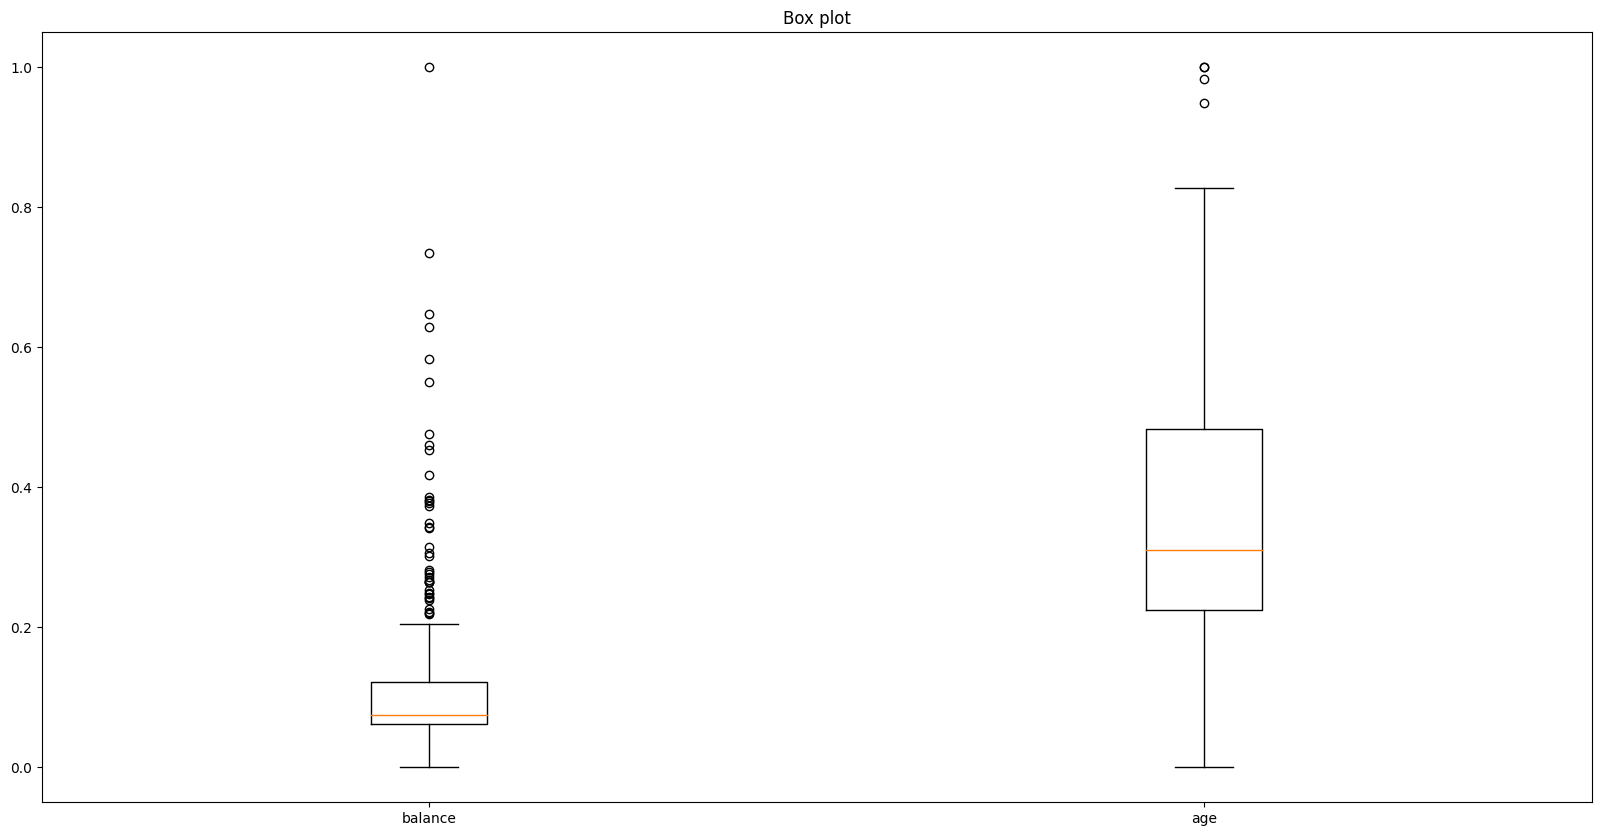

In [263]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.boxplot(normalized_data[numeric])
plt.xticks([1,2], numeric)
plt.title('Box plot')
plt.show()

In [293]:
Q1 = normalized_data['age'].quantile(0.25)
Q3 = normalized_data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = normalized_data[(normalized_data['age'] >= lower_bound) & (normalized_data['age'] <= upper_bound)]

In [294]:
Q1 = normalized_data['balance'].quantile(0.25)
Q3 = normalized_data['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data_no_outliers[(data_no_outliers['balance'] >= lower_bound) & (data_no_outliers['balance'] <= upper_bound)]

In [295]:
data_no_outliers

,balance,age,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default,housing,loan,y
0,0.121033,0.172414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.105778,0.258621,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.110176,0.172414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.058649,0.672414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.084727,0.258621,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.058649,0.672414,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.106476,0.310345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
395,0.059941,0.655172,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.082143,0.241379,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# Иерархический кластерный анализ (расстояние Евклида)

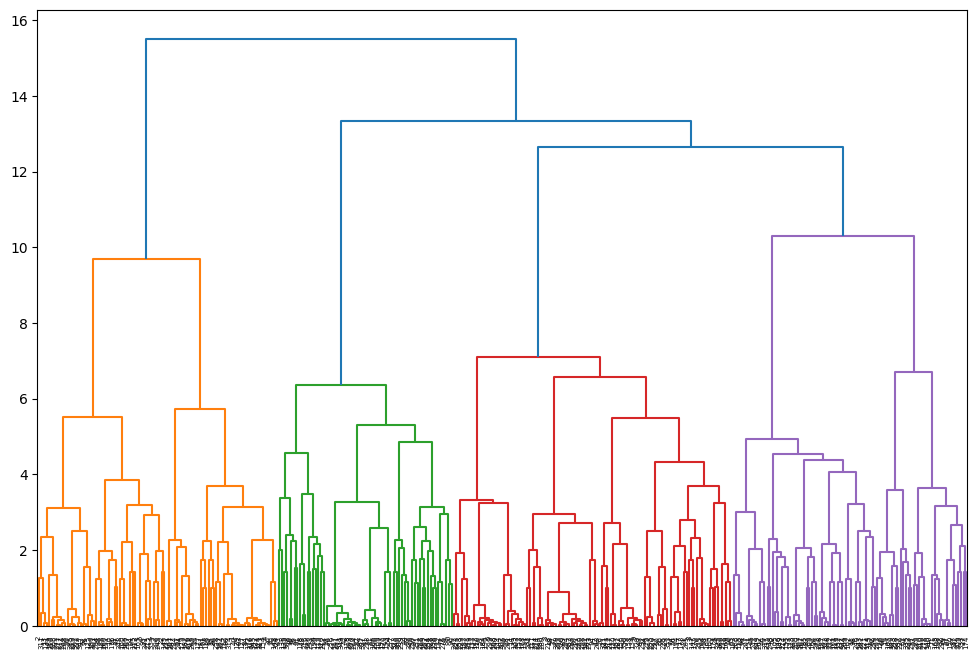

In [296]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(data_no_outliers, method='ward', metric='euclidean')
plt.figure(figsize=(12, 8))
dendrogram(link) 
plt.show()

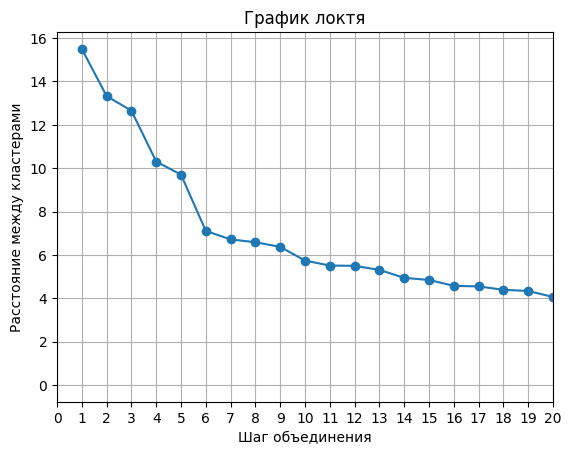

In [298]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.xlim(0,20)
plt.xticks(range(21))
plt.title('График локтя')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние между кластерами')
plt.grid()
plt.show()

In [300]:
data_no_outliers['cluster'] = fcluster(link, 3, criterion='maxclust')
data_no_outliers.groupby('cluster').mean().T

cluster,1,2,3
balance,0.090123,0.083404,0.086614
age,0.303786,0.426402,0.337476
job_admin,0.065217,0.029851,0.157360
job_blue-collar,0.021739,0.522388,0.213198
job_entrepreneur,0.032609,0.044776,0.030457
job_housemaid,0.010870,0.044776,0.000000
job_management,0.500000,0.074627,0.111675
job_retired,0.010870,0.074627,0.040609
job_self-employed,0.086957,0.044776,0.035533
job_services,0.010870,0.044776,0.116751


    Оптимальным оказалось количество кластеров равное 3. 
    
    Проинтепретируем 1, 2 и 3 кластера соответственно:

    Возраст людей: в среднем возраст в 1 и 3 кластере одинаковый, но во 2 люди сильно старше
    Семейное положение: в 1 и 3 кластере в среднем поровну одиноких и женатых людей, во 2 кластере в основном женатые (70%) либо разведенные (18%) люди
    Образование: в 1 кластере все люди с высшим образованием, во 2 кластере 80% людей даже не закончило школу, в 3 кластере почти все получили только школьное образование
    Работа: в 1 кластере в основном работают менеджеры и технари, во 2 кластере в основном физический труд, в 3 кластере в основном технари, работники в сфере услуг, физический труд (нет ярко выраженного отличия)
    Кредит: в 3 кластере больше всего кредитов (23%), в 1 и 2 примерно одинаково (11%)
    Стоит давать кредит: в 1 кластере больше всего кредитоспособных людей, во 2 меньше всего, в 3 чуть больше чем во втором
    
    

# Иерархический кластерный анализ (расстояние Гавера)

In [256]:
import gower

gm = gower.gower_matrix(data_no_outliers)
link = linkage(gm)

C:\Users\egorl\AppData\Local\Temp\ipykernel_16492\3949916241.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(gm)


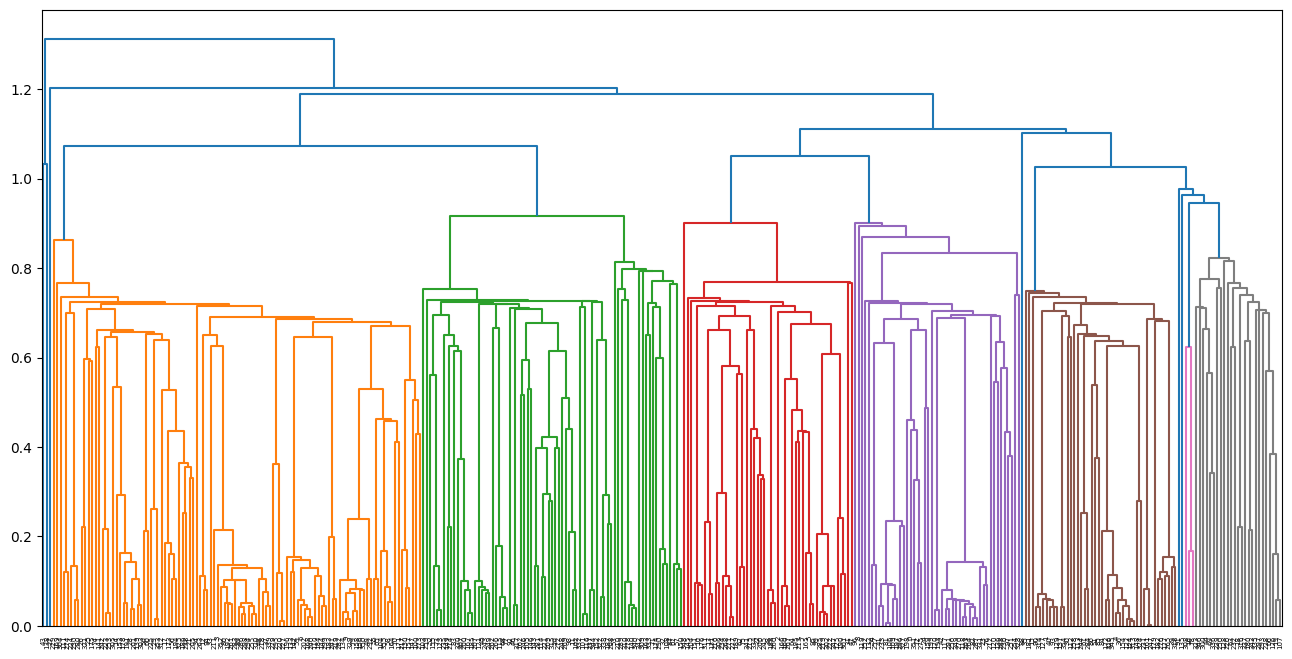

In [257]:
plt.figure(figsize=(16, 8))
dendrogram(link) 
plt.show()

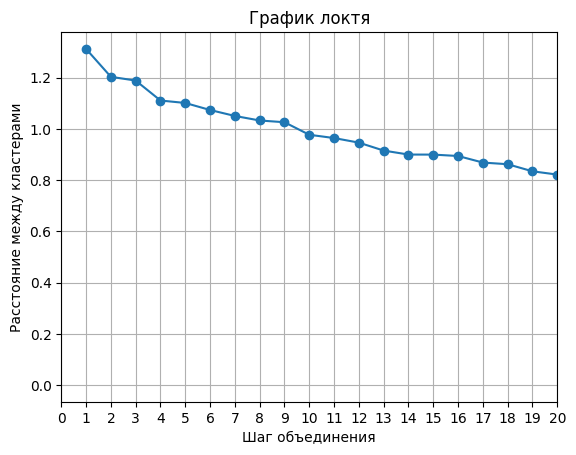

In [258]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.xlim(0,20)
plt.xticks(range(21))
plt.title('График локтя')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние между кластерами')
plt.grid()
plt.show()

In [259]:
data_no_outliers['cluster'] = fcluster(link, 5, criterion='maxclust')
data_no_outliers.groupby('cluster').mean().T

cluster,1,2,3,4,5
balance,0.039483,0.085730,0.085962,0.090707,0.204887
age,0.318966,0.327967,0.396018,0.316782,0.827586
job_admin,0.000000,0.171271,0.061856,0.026667,0.000000
job_blue-collar,0.000000,0.232044,0.288660,0.120000,0.000000
job_entrepreneur,0.500000,0.011050,0.051546,0.053333,0.000000
job_housemaid,0.000000,0.000000,0.030928,0.013333,0.000000
job_management,0.000000,0.071823,0.247423,0.480000,0.000000
job_retired,0.000000,0.038674,0.051546,0.013333,1.000000
job_self-employed,0.000000,0.038674,0.092784,0.026667,0.000000
job_services,0.000000,0.121547,0.020619,0.040000,0.000000


    Оптимальным оказалось количество кластеров равное 5. 
    
    При этом в 1 кластере выделилось всего два человека с низким уровнем баланса. В 5 кластере всего 1 человек очень пожилого возраста, но с высоким балансом относительно других кластеров. Эти кластеры содержат в себе аномалии относительно генеральной совокупности.
    
    Проинтепретируем 2, 3 и 4 кластера соответственно:

    Количество людей: во 2 кластере оказалось 181 человека, в 3 кластере 97 человек, в 4ом кластере 75 человек.
    Возраст людей: в среднем возраст в 2 и 3 кластере одинаковый, но в 4 люди сильно моложе
    Семейное положение: во 2 кластере в основном женатые (58%) либо одинокие (30%) люди, в 3 все люди женаты, а в 4 все люди либо разведены, либо одиноки
    Образование: во 2 кластере все люди имеют школьное образование, в 3 либо имеют высшее, либо только образование начальной школы (50 на 50), в 4 большая часть людей имеет высшее образование (77%)
    Работа: во 2 кластере оказалось много техников (26%), рабочего класса(23%), а также работников в сфере услуг и адинистрации, в 3 кластере оказалось больше всего рабочего класса и менеджеров, в 4м кластере оказалось больше всего менеджеров (48%)
    Кредит: во 2 кластере больше всего людей имеют кредит (23%), в остальных примерно поровну 
    Стоит давать кредит: во 2 кластере меньше всего кредитоспособных людей (9%), в 3 в 4 кластере оказалось больше всего кредитоспособных людей (12% и 14% соответственно)
    
    В данных видна связь между уровнем образования, работой, семейным положением и кредитоспособностью.

# K-means

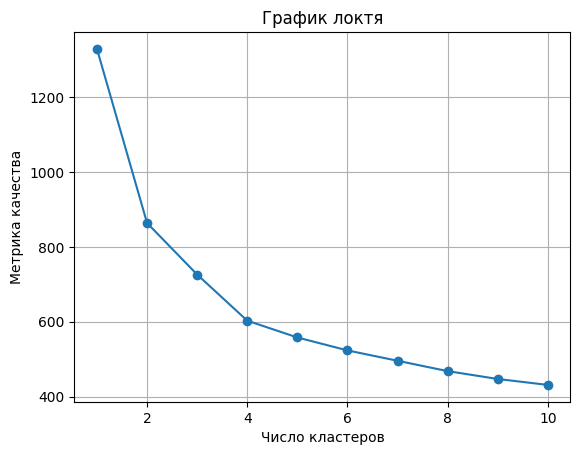

In [292]:
from sklearn.cluster import KMeans

K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42, n_init=200).fit(data_no_outliers) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Метрика качества')
plt.title('График локтя')
plt.grid()
plt.show()

In [289]:
model = KMeans(n_clusters=4, random_state=42, n_init=200).fit(data_no_outliers)
data_no_outliers['cluster'] = model.labels_

In [291]:
data_no_outliers.groupby('cluster').mean().T

cluster,0,1,2,3
balance,0.086233,0.085900,0.089390,0.084828
age,0.378534,0.279957,0.321630,0.421944
job_admin,0.162162,0.175000,0.054545,0.018182
job_blue-collar,0.243243,0.212500,0.018182,0.600000
job_entrepreneur,0.027027,0.000000,0.063636,0.036364
job_housemaid,0.000000,0.000000,0.009091,0.054545
job_management,0.090090,0.037500,0.527273,0.036364
job_retired,0.054054,0.037500,0.009091,0.072727
job_self-employed,0.036036,0.037500,0.072727,0.054545
job_services,0.099099,0.150000,0.018182,0.036364


    Оптимальным оказалось количество кластеров равное 4. 
    
    Проинтепретируем 1, 2, 3 и 4 кластера соответственно:

    Возраст людей: в 1 кластере люди выше среднего возраста, во 2 кластере молодые люди, в 3 кластере люди чуть ниже среднего возраста, в 4 кластере уже взрослые люди
    Семейное положение: в 1 кластере все люди женаты, во втором кластере большинство людей одинокие (71%) либо разведенные, в 3 кластере поровну одиноких женатых людей, в 4 кластере в основном все женаты (78%)
    Образование: в 1 и 2 кластерах почти все люди закончили только школу, в 3 кластере почти все люди с высшим образованием, в 4 кластере почти все люди не закончили даже школу
    Работа: в 1 и 2 кластерах примерно одинаковое распределение по должностям: в основном либо работают в администрации, либо техниками, либо физический труд, либо в сфере услуг, в 3 кластере люди в основном являются менеджерами, в 4 кластере большинство занимается физическим трудом.
    Стоит давать кредит: наиболее кредитоспособные кластеры 2 и 3, в 1 и 4 кластерах кредиты выдают меньше 
    
    в 4 кластере четко выделился рабочий необразованный класс, 1 и 2 кластера - средний класс со средним образованием, 3 кластер - средний класс с высшим образованием (в основном менеджеры)